# Supplementary figure (QC)

In [1]:
experiment_ids = 'f1'
timepoints = 'all'
regions = 'cusanovich_dm6_peaks_1kb'

In [2]:
label = '_'.join([experiment_ids, timepoints, 'windows'])

## Imports

In [3]:
import sys
import os

In [4]:
import numpy as np
import pandas as pd
import scipy
import scanpy as sc
from sklearn.mixture import GaussianMixture

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sys.path.append('..')
from utils import settings

## Data files

These files need to be precomputed 

In [7]:
counts_file = lambda exp_id: '/icgc/dkfzlsdf/analysis/B260/users/heinent/projects/f1_pipeline/data/processed/%s/cell_barcodes/%s.readdepth.barcodes.txt' % (exp_id, exp_id)
cells_index = lambda exp_id: '/icgc/dkfzlsdf/analysis/B260/users/heinent/projects/f1_pipeline/data/processed/%s/cell_barcodes/%s.readdepth_auto.cells_indextable.txt' % (exp_id, exp_id)
fragment_file = lambda exp_id: '/icgc/dkfzlsdf/analysis/B260/users/heinent/projects/f1_pipeline/data/processed/%s/alignment/fragment_length_count.txt' % exp_id

In [8]:
adata = sc.read(os.path.join(settings.DATA_DIR, label, 'total_counts.h5ad'))

/icgc/dkfzlsdf/analysis/B260/users/heinent/envs/f1_analysis/lib/python3.6/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/icgc/dkfzlsdf/analysis/B260/users/heinent/envs/f1_analysis/lib/python3.6/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [9]:
F1_IDS = 'F1-' + pd.read_csv(settings.EXPERIMENT_INFO, sep='\t', index_col=0)['paternal_id']

## Plot settings

In [10]:
%config InlineBackend.figure_format = 'retina'

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.size'] = 7
sns.set_style("ticks")

In [11]:
FIGURE_NUMBER = 'supp21'
PANEL_COUNTS = 1

def save_panel(fig):
    global PANEL_COUNTS
    
    fig_dir = 'figures/fig%s' % FIGURE_NUMBER
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)
    fig.savefig(fig_dir + '/panel_%d.svg' % PANEL_COUNTS, dpi=350)
    PANEL_COUNTS += 1

## Plot read distribution and background / cell cutoff

In [12]:
def plot_barcode_dist(exp_id, legend=False):
    # determine cutoff using Gaussian mixture model
    count_table = pd.read_csv(counts_file(exp_id), sep='\t')
    count_table = count_table.query('Experiment != "bkgd"')
    count_table['LogReadCount'] = np.log10(count_table['ReadCount'])

    log_counts = count_table['LogReadCount'].to_numpy().reshape(-1, 1)
    gm = GaussianMixture(n_components = 2, n_init=5).fit(log_counts)
    prob_assignment = gm.predict_proba(log_counts)
    
    cluster_cells_idx = gm.means_.argmax()
    cluster_backg_idx = gm.means_.argmin()
    
    ids = (prob_assignment[:, cluster_cells_idx] > .95).astype(int)
    cutoff = log_counts[ids==1].min()

    f1_id = F1_IDS[exp_id]
    fig, ax = plt.subplots(figsize=(1.8, 1.2))
    sns.histplot(data=count_table, x='LogReadCount', stat='density', color='darkgrey', ax=ax)
    ax.set(xlabel='$\log_{10}$(#Reads)', title='Barcodes (%s)' % f1_id, ylim=(-.03, 1.03))
    xlim = ax.get_xlim()
    r = np.linspace(*xlim, 100)
    
    pdf_cells = scipy.stats.norm.pdf(r, loc=gm.means_[cluster_cells_idx].item(), scale=np.sqrt(gm.covariances_[cluster_cells_idx]).item())
    pdf_backg = scipy.stats.norm.pdf(r, loc=gm.means_[cluster_backg_idx].item(), scale=np.sqrt(gm.covariances_[cluster_backg_idx]).item())
    
    ax.plot(r, pdf_cells * gm.weights_[cluster_cells_idx], label='Cells', linewidth=3)
    ax.plot(r, pdf_backg * gm.weights_[cluster_backg_idx], label='Background', linewidth=3)
    
    ax.axvline(cutoff, linestyle='--', c='black', label='Cutoff')
    if legend:
        plt.legend(frameon=False)
    sns.despine(trim=True)
    save_panel(plt.gcf())
    plt.show()
    plt.close()

/icgc/dkfzlsdf/analysis/B260/users/heinent/envs/f1_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


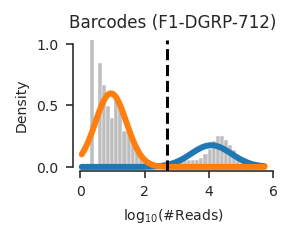

/icgc/dkfzlsdf/analysis/B260/users/heinent/envs/f1_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


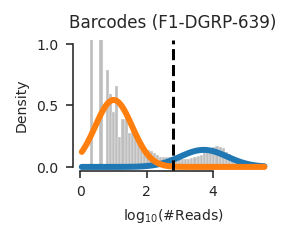

/icgc/dkfzlsdf/analysis/B260/users/heinent/envs/f1_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


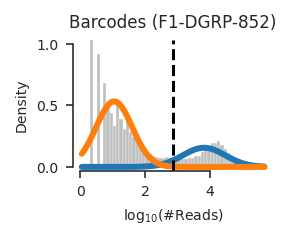

/icgc/dkfzlsdf/analysis/B260/users/heinent/envs/f1_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


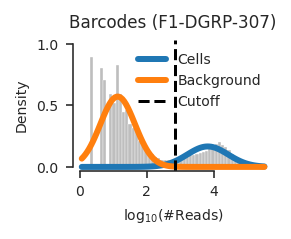

In [13]:
for exp_id in ['SS148', 'SS157', 'SS158']:
    plot_barcode_dist(exp_id)
plot_barcode_dist('SS159', legend=True)
plt.show()

## Plot reads per cell

In [14]:
def plot_read_dist(exp_id):
    count_table = pd.read_csv(counts_file(exp_id), sep='\t', index_col=0)
    count_table['LogReadCount'] = np.log10(count_table['ReadCount'])
    count_table['Experiment'] = pd.Categorical(count_table['Experiment'], categories=['2-4hr', '6-8hr', '10-12hr'])
    valid_barcodes = pd.read_csv(cells_index(exp_id), sep='\t', index_col=0, names=['Barcode', 'Experiment'])
    df = count_table[count_table.index.isin(valid_barcodes.index)]
    ncells = df['Experiment'].value_counts()

    f1_id = F1_IDS[exp_id]
    fig, ax = plt.subplots(figsize=(1.8, 1.2))
    sns.violinplot(x='Experiment', y='LogReadCount', data=df, log_scale=True, palette=adata.uns['timepoint_colors'], ax=ax)
    ax.set(xlabel='Collection window', ylabel='$\log_{10}$(#Reads)', title='Reads per cell (%s)' % f1_id)
    ax.set_xticklabels(['%s\n(%d cells)' % (label.get_text(), ncells.loc[label.get_text()]) for label in ax.get_xticklabels()])
    ax.xaxis.set_ticks_position('none') 
    sns.despine(trim=True, bottom=True)
    save_panel(fig)
    plt.show()
    plt.close()

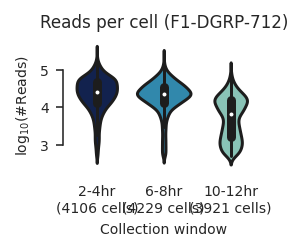

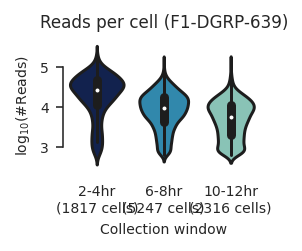

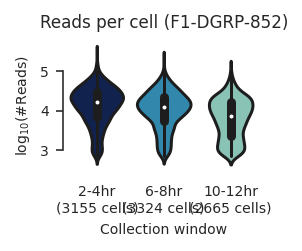

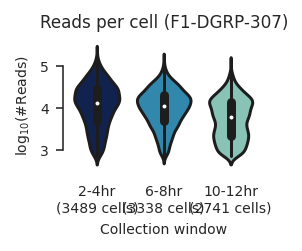

In [15]:
for exp_id in settings.F1_EXP_IDS:
    plot_read_dist(exp_id)

## Plot fragment distribution

In [16]:
def plot_fragment_dist(exp_id):
    df = pd.read_csv(fragment_file(exp_id), names=['Count', 'Length'], sep=' ')
    df['Count'] = df['Count'] / 100000
    f1_id = F1_IDS[exp_id]
    fig, ax = plt.subplots(figsize=(1.8, 1.2))
    sns.lineplot(x='Length', y='Count', data=df, linewidth=3, ax=ax)
    ax.fill_between(x='Length', y1='Count', data=df, alpha=.5)
    ax.set(xlim=(0, 1000), title='Fragment sizes (%s)' % f1_id, ylabel='Count (x100,000)')
    sns.despine(trim=True)
    save_panel(fig)
    plt.show()
    plt.close()

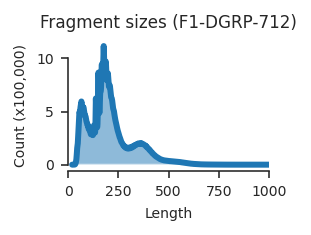

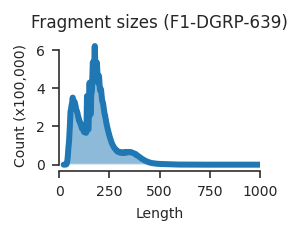

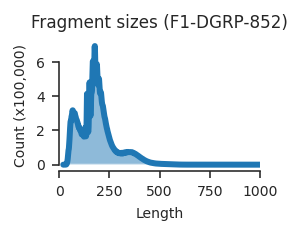

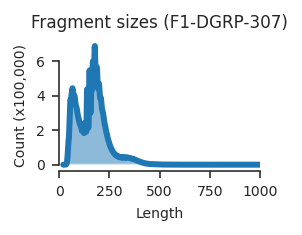

In [17]:
for exp_id in settings.F1_EXP_IDS:
    plot_fragment_dist(exp_id)